In [ ]:
#################################################################################
# Here we aim to cluster users based on Click History and User Portraits
# 1. The goal is to use DBSCAN to cluster users
# 2. Hyper parameter estimation:
#    epsilon: use k-nearest neighbors to find the optimal average distance
#    minpts: k
#################################################################################

In [1]:
import os
os.chdir('/tf/shared')
from tqdm import tqdm

In [2]:
# 0. Read User Feature Data
from DataPrep import getUserFeaturesTrainSet
data = getUserFeaturesTrainSet()
print(data.shape)

Number of Multiprocessing threads: 31
(260087, 390)


In [ ]:
# 2. Parameter tuning with K-nearest neighbor
from sklearn.neighbors import NearestNeighbors
import multiprocessing as mp
from matplotlib import pyplot as plt
from tqdm import tqdm

data_subset = data[::5]
K = list(range(5, 1001))
eps = []

def avgDist1(distances):
    return (sum(distances) - distances[0])/(len(distances)-1)
def avgDist(distanceMatrix):
    avgs = []
    for x in distanceMatrix:
        avgs.append(avgDist1(x))
    return sum(avgs)/len(avgs)

for k in tqdm(K):
    NN = NearestNeighbors(n_neighbors = k, n_jobs = -1)
    NN.fit(data_subset)
    d, _ = NN.kneighbors(data_subset, n_neighbors = k + 1)
    # take average distance
    avg_dist = avgDist(d)
    eps.append(avg_dist)

# plt.plot(K, eps)
# plt.show()
# this part of script was run on GAIVI


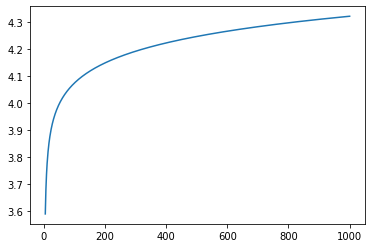

In [33]:
gaivi_output = open('data/gaivi_job.out')
lines = gaivi_output.readlines()
eps = [float(s.strip('\n')) for s in lines]
K = list(range(5, 1001))
plt.plot(K, eps)
plt.show()
# determine 400 clusters and eps = 4.23

In [ ]:
# try optics 
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples = 900, n_jobs = -1)
optics.fit(data)
labels = optics.labels_
print('number of clusters: ' + str(max(labels)))

0


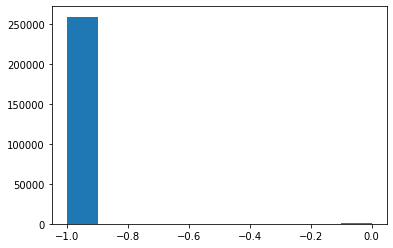

In [54]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.25, min_samples = 600)
dbscan.fit(data)
labels = dbscan.fit_predict(data)
print(max(labels))
plt.hist(labels)
plt.show()

In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 100)
km.fit(data)
labels = km.predict(data)
counts = [0]*100
for l in labels:
    counts[l] = counts[l] + 1
print(counts)
print(min(counts))

[6547, 1866, 1670, 2629, 2265, 1529, 2052, 2317, 2007, 1562, 6448, 1480, 1842, 2669, 1979, 3926, 1584, 2901, 3070, 2026, 5996, 1758, 2598, 1970, 2117, 1866, 1605, 2331, 1560, 1868, 6333, 1933, 3593, 1482, 2380, 1783, 2335, 2646, 2219, 1398, 3607, 1749, 1970, 4345, 3194, 2974, 5261, 1718, 2118, 2797, 2217, 3604, 5282, 4206, 1942, 2179, 1529, 1705, 2590, 1481, 1360, 3105, 3281, 2411, 1679, 2810, 3252, 2165, 5320, 3040, 1396, 2020, 1964, 4268, 2028, 1445, 2893, 5426, 1528, 1417, 2052, 2529, 2011, 1367, 1422, 1478, 7692, 3042, 2021, 2060, 2106, 2356, 1847, 3798, 2075, 1804, 1916, 2183, 3397, 1515]
1360


In [74]:
# 4. save to pickle
import pickle
with open('/tf/shared/data/ClusterLabels100.pkl', 'wb') as f:
    pickle.dump((km, labels), f)